In [1]:
#Bitte ausführen, damit alles Notwendige importiert wird
#Note: Bei Änderungen der zugrundeliegenden Python-Files muss Jupyter neugestartet werden
import scipro
%matplotlib inline

In [2]:
%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">


# Scientific Programming Lab

- Mathmatische Inhalte
  - Funktionen
  - Ableitung und Ableitungsregeln
      - Faktorregel
      - Potenzregel
      - Summenregel
      - Produktregel
      - Kettenregel
- Informatische Inhalte
  - Fortgeschrittene Konzepte der Vererbung und Objektorientierung
      - Mehrfachvererbung und Mixins
      - Interne Attribute
      - Datenklassen und Deep Copy
      - Typhinweise
      - Statische Methoden
      - Klassenmethoden
      - Abstrakte Basisklassen

## Fortgeschrittene Konzepte der Vererbung und Objektorientierung

Letztes Mal haben wir bereits die Grundlagen der Vererbung und objektorientierten Programmierung von Python kennengelernt.

In diesem Kapitel werden weitere *Sprachfeatures* der Objektorientierung Python gezeigt, die insbesondere in großen Projekten bei der Strukturierung helfen können. Diese fortgeschrittenen Konzepte sind allerdings keine Allzwecklösung, sondern situativ einsetzbar. Bei der Arbeit in Team sollte sich vorher in einen *Style-Guide* festgelegt werden, welche Konzepte und Konventionen im Code genutzt werden.

### Mehrfachvererbung

In Python ist es im Unterschied zu anderen Programmiersprachen wie Java und C# möglich, dass eine Unterklasse von *mehreren Basisklassen* erbt:

In [16]:
class Mom:
    def has_brown_eyes(self):
        print("eyes are brown")

    def knows_best(self):
        print("she does")

class Dad:
    def has_red_hair(self):
        print("hair is red")

    def knows_best(self):
        print("he does")

class Child(Mom, Dad):
    pass

c = Child()
c.has_brown_eyes()
c.has_red_hair()

eyes are brown
hair is red


Klassen erben Methoden und Attribute von allen Basisklassen.

Falls Basisklassen allerdings Attribute mit gleichem Namen haben, muss eines davon Präzedenz haben:


In [17]:
c.knows_best()

she does


Dieses Problem wird auch *Diamant-Problem* genannt.

![Klassendiagramm für das obige Codebeispiel mit Mom, Dad, Child](./images/diamantproblem.png)

Python löst es durch die **M**ethod **R**esolution **O**rder. Der [Algorithmus](https://docs.python.org/3/howto/mro.html) legt fest, welche Methode Vorrang hat. Faustregel: Von spezifisch nach allgemein, von links nach rechts.

Im Zweifelsfall kann die Reihenfolge mit `mro()` abgerufen werden:

In [5]:
class A:
    pass

class B1(A):
    pass
class B2(A):
    pass
class B3(A):
    pass

class C1(B1, B2, B3):
    pass
class C2(B1, B2, B3):
    pass

class D(C1, C2):
    pass

D.mro()

[__main__.D,
 __main__.C1,
 __main__.C2,
 __main__.B1,
 __main__.B2,
 __main__.B3,
 __main__.A,
 object]

Gut geeignet ist Mehrfachvererbung für sogenannte **Mixins**, mit denen man Funktionalität in eine Klasse "hineinmischt".

In [6]:
class HeadphoneFeature:
    def play_sound(self):
        print("I can play sound")
    
class MicrophoneFeature:
    def listen(self):
        print("I can listen to sound")    

class AudioControlFeature:
    def playpausebutton(self):
        print("I can press play and pause")    

class BluetoothFeature:
    def connect(self):
        print("I can connect to bluetooth")    

class Headset(HeadphoneFeature, MicrophoneFeature, AudioControlFeature, BluetoothFeature):
    pass

h = Headset()
h.play_sound()
h.listen()
h.playpausebutton()
h.connect()

I can play sound
I can listen to sound
I can press play and pause
I can connect to bluetooth


Ein Mixin realisiert eher ein "Hat-Ein" statt ein "Ist-Ein". Wir sprechen hier auch von **Komposition**.
In anderen Programmiersprachen sind *Komposition* (*hat-ein*) und *Vererbung* (*ist-ein*) klarer voneinander abgegrenzt, z.B. durch Interfaces, traits, oder das Delegator-Architekturmuster.

<div class="remark">
    <img src="images/caution1695.png" width=120 align=right alt="https://openclipart.org/detail/1695/warning-sign" />   
    <h3>Weniger ist mehr</h3>
    <p>
    Mehrfachvererbung stellt ein mächtiges Programmierwerkzeug dar, das allerdings die Komplexität des Codes erhöht und unerwartete Effekte haben kann, z.B. wenn man Code ändert.<br>
    Viele objektorientierte Programmiersprachen erlauben deshalb keine Mehrfachvererbung.<br>
    Der Einsatz in Python sollte nur bei Notwendigkeit erfolgen und wohlüberlegt sein.<br>
    </p>
</div>



### Interne Attribute

Bei der Vererbung kann es sinnvoll sein, Unterklassen den Zugriff auf bestimmte Funktionalität der Basisklasse nicht zu gewähren. In manchen objektorientierten Programmiersprachen werden solche Attribute und Methoden *private* genannt. In Python können Unterstriche verwendet werden, um zu verdeutlichen, dass Elemente für den internen Gebrauch sind:
* **Kein Unterstrich**: Das Element ist öffentlich (engl. *public*) und darf von außen genutzt werden.
* **Ein Unterstrich**: Das Element ist privat (engl. *private*) und sollte nicht (aber kann) von außen genutzt werden.
* **Zwei Unterstriche**: Das Element ist privat sowie klassen-spezifisch und sollte nicht von Unterklassen überschrieben werden. 

In [7]:
class InternalsDemo():
    def public_method(self):
        print("I'm public!")
    def _private_method(self):
        print("I'm private!")
    def __class_method(self):
        print("I'm InternalsDemo-specific!")

i = InternalsDemo()
i.public_method()
i._private_method()
i.__class_method()

I'm public!
I'm private!


AttributeError: 'InternalsDemo' object has no attribute '__class_method'

Der doppelte Unterstrich löst ein Feature namens *Name Mangling* aus. Die Methode erhält den Klassennamen als Präfix, sodass bei der Vererbung keine Verwechslungen auftreten können.

In [11]:
i._InternalsDemo__class_method()

I'm InternalsDemo-specific!


Viele IDEs respektieren die Intention des Unterstrichs auch, zum Beispiel bei der Auto-Vervollständigung. Probieren Sie es aus:

In [12]:
#Probieren Sie die Auto-Vervollständigung (Tabulator-Taste)
#Welche Methode wird angezeigt?
i.public_method()
#Welche Methoden werden angezeigt, wenn schon ein Unterstrich dasteht?
i._private_method()

I'm public!
I'm private!


Der Unterschied zwischen den Unterstrichen zeigt sich bei der Vererbung. Methoden mit zwei Unterstrichen können dank Name Mangling nicht unabsichtlich überschrieben werden.

In [18]:
class DerivedInternals(InternalsDemo):

    def _private_method(self):
        print("I've overwritten a private method!")
    
    def __class_method(self):
        print("I'm DerivedInternals-specific!")

d = DerivedInternals()
d._private_method()
d._InternalsDemo__class_method()
d._DerivedInternals__class_method()

I've overwritten a private method!
I'm InternalsDemo-specific!
I'm DerivedInternals-specific!


Private Methoden eignen sich für interne Hilfsmethoden sowie den internen Zustand, der vor Nutzenden der Klasse verborgen sein soll. Dies nennt man auch **Information Hiding** - wenn Code, der eine Klasse benutzt wird, die genaue Funktionsweise einer Klasse verborgen wird, dann müssen die vorgegebenen Methoden benutzt werden, um mit der Klasse zu interagieren. So kann es nicht zu Fehlern kommen, wenn die interne Funktionalität sich ändert oder nicht richtig verstanden wird.

Unten ist eine Klasse `CyclicList` für eine Liste mit zyklischem Zugriff definiert. Geht man über das Ende der Liste aus, fängt man wieder am Anfang an.

In [4]:
class CyclicList():
    def __init__(self, input_list=[]):
        self._list = input_list
        self._length = len(input_list)
    
    def add(self, item):
        self._list.append(item)
        self._length += 1

    def __getitem__(self, key):
        return self._list[key % self._length]
        
cl = CyclicList([0, 1, 2])
cl.add(3)
cl.add(4)
cl.add(5)
print(f"cl[3]{cl[3]}")
print(f"cl[6]{cl[6]}")
print(f"cl[11]{cl[11]}")    

cl[3]3
cl[6]0
cl[11]5


Eine Unterklasse `CyclicListWithBulkAdd` soll nun ermöglichen, gleich mehrere Elemente der Liste hinzuzufügen. Allerdings wurde die Basisklasse wohl nicht richtig verstanden...

In [33]:
# Falsch
#class CyclicListWithBulkAdd(CyclicList):
#
#    def __init__(self, input_list=[]):
#        super().__init__(input_list)
#
#    def bulkadd(self, add_list):
#        self._list.append(add_list)

# YOUR CODE HERE
class CyclicListWithBulkAdd(CyclicList):

    def __init__(self, input_list=[]):
        super().__init__(input_list)

    def bulkadd(self, add_list):
        for item in add_list:
            self.add(item)

bl = CyclicListWithBulkAdd([0, 1, 2])
bl.bulkadd([3, 4, 5])
print(f"bl[3]{bl[3]}")
print(f"bl[6]{bl[6]}")
print(f"bl[11]{bl[11]}")

scipro.Test("String-Operationen").equals("bl[3]", bl[3], 3).equals("bl[6]", bl[6], 0).equals("bl[11]", bl[11], 5).report()

bl[3]3
bl[6]0
bl[11]5


<div class="aufgabe">
    <h3>Debugging</h3>
    <img src="images/bug29356.png" width=60 align=right alt="https://openclipart.org/detail/29356/bug" />
    Was läuft bei der <tt>CyclicListWithBulkAdd</tt> schief? Warum werden nicht die gleichen Werte wie bei der <tt>CyclicList</tt> ausgegeben?<br>
    Ändern Sie die Unterklasse so, dass keine privaten Attribute der Oberklasse verwendet werden, und reparieren Sie so den Fehler.

</div>

### Datenklassen und Deep Copy

**Datenklassen** (engl. [dataclass](https://docs.python.org/3/library/dataclasses.html)) bieten sich für Objekte an, bei denen die Datenhaltung im Vordergrund steht. Sie werden mit dem *Dekorator* `@dataclass` gekennzeichnet.

Die Attribute der Datenklasse werden direkt in der Klassendefinition angegeben. Python erzeugt Methoden wie z.B. Konstruktoren automatisch.

In [12]:
from dataclasses import dataclass

@dataclass
class ProductData:
    name: str
    color: str
    price: float
    stock: int = 0

#Automatisch generiertes __init__
p1 = ProductData("Wackelpudding", "Rot", 0.39, 17)
#Automatisch generiertes __string__
print(p1)

#Automatisch generierter Default für stock
p2 = ProductData("Wackelpudding", "Grün", 0.49)
print(p2)


ProductData(name='Wackelpudding', color='Rot', price=0.39, stock=17)
ProductData(name='Wackelpudding', color='Grün', price=0.49, stock=0)


Objekt-Variablen werden in Python als Referenzen gehandhabt.
Das heißt, die Zuweisung auf eine Variable ist nur ein Verweis auf das Original, keine Kopie.
Das kann problematisch sein, falls man die neue Variable verändert, das Original aber unverändert bleiben soll.

Dieses Beispiel zeigt das <font color='red'>falsche</font> Vorgehen beim Anlegen einer Produktvariante:

In [13]:
p1 = ProductData("Wackelpudding", "Rot", 0.39, 17)
p2 = ProductData("Wackelpudding", "Grün", 0.49)

#Anlegen einer neuen Variante
p3 = p2
p3.color = "Yellow"
p3.stock = 5

print(f"p1:{p1}")
print(f"p2:{p2}")
print(f"p3:{p3}")


p1:ProductData(name='Wackelpudding', color='Rot', price=0.39, stock=17)
p2:ProductData(name='Wackelpudding', color='Yellow', price=0.49, stock=5)
p3:ProductData(name='Wackelpudding', color='Yellow', price=0.49, stock=5)


Um statt einer Referenz ein neues Objekt zuzuweisen, muss man das Objekt kopieren. Es werden zwei Arten unterschieden:
* *shallow copy* erzeugt ein neues Objekt, die Attribute werden aber referenziert, nicht kopiert.
* *deep copy* erzeugt ein neues Objekt, und kopiert (rekursiv) alle Attribute.

Mit dem Modul [`copy`](https://docs.python.org/3/library/copy.html) können wir nun <font color='green'>richtig</font> eine Variante anlegen, ohne das Original zu verändern:

In [14]:
import copy

p1 = ProductData("Wackelpudding", "Rot", 0.39, 17)
p2 = ProductData("Wackelpudding", "Grün", 0.49)

#Anlegen einer neuen Variante
p3 = copy.deepcopy(p2)
p3.color = "Yellow"
p3.stock = 5



print(f"p1:{p1}")
print(f"p2:{p2}")
print(f"p3:{p3}")



p1:ProductData(name='Wackelpudding', color='Rot', price=0.39, stock=17)
p2:ProductData(name='Wackelpudding', color='Grün', price=0.49, stock=0)
p3:ProductData(name='Wackelpudding', color='Yellow', price=0.49, stock=5)


Welche Kopie-Variante verwendet werden soll, hängt davon ab, ob die Kopie verändert wird (bzw. ob Änderungen sich auf das Original auswirken sollen), und wieviel Ressourcen verbraucht werden dürfen. Die shallow copy ist im Regelfall schneller und speichersparender, aber "gefährlicher".

### Typhinweise

Obwohl Python dynamisch typisiert ist, und man für Variablen, Parameter, etc. keine Datentypen angeben muss, könnte es hilfreich sein, das zu tun.

**Typhinweise** (engl. [type hints](https://docs.python.org/3/library/typing.html)) geben an, welche Typen von einer Funktion erwartet werden und welche als Rückgabewert auftreten.

Dies hilft vor allem bei komplexem Code, insbesondere wenn nicht nur eine Person, sondern ein Team ihn entwickelt. Ein gutes Beispiel dafür sind *Application Programming Interfaces* (APIs), also Schnittstellen von Bibliotheken, die bei der Softwareentwicklung von Dritten verwendet werden.

Das folgende Beispiel zeigt die Entwicklerdokumentation ohne und mit type hints:


In [17]:
def hintless_func(multiplicator, multiplicand):
    '''
    Eine Funktion ohne type hints.
    '''
    return multiplicand * multiplicator

print(hintless_func(3, "ha"))

hintless_func?

hahaha


In [18]:
def helpful_func(multiplicator: int, multiplicand: str) -> list:
    '''
    Eine hilfreiche Funktion mit type hints.
    '''
    result: list = [multiplicand] * multiplicator
    return result

print(helpful_func(3, "ho"))

helpful_func?

['ho', 'ho', 'ho']


Trotz type hints bleibt Python dynamisch typisiert. Das heißt, ein Aufruf mit anderen Datentypen bleibt möglich.

In [19]:
print(helpful_func(3, ['a', 'b', 'c'] ))

[['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c']]


Viele Integrierte Entwicklungsumgebungen (IDEs) nutzen Type Hints, und Hinweise beim Programmieren und der Autovervollständigung zu geben. Jupyter unterstützt dies z.B. durch das Plugin *jupyterlab-lsp*.

Erweiterungen wie *mypy* erlauben es, die Einhaltung der Datentypen zu kontrollieren, indem sie statisch (i.d.R. beim Kompilieren) geprüft werden.

### Statische Methoden

In einer Klasse definierte Methoden sind normalerweise dem Objekt zugeordnet, z.B. weil Sie mit Objektattributen arbeiten.

Es kann aber hilfreich sein, Methoden der Klasse zuzuordnen, wenn ihre Durchführung nicht von einer konkreten Objekt-Instanz abhängen soll. Ein Beispiel sind Hilfsmethoden, die thematisch in die Klasse gehören, für die aber kein Objekt notwendig ist.

Eine solche **statische Methode** wird mit dem Dekorater `@staticmethod` markiert. Achtung: es wird kein `self`-Parameter verwendet! Der Aufruf erfolgt statt mit dem Objekt- mit dem Klassennamen.


In [29]:
class Palindrome:
    '''
    Palindrome sind Wörter, die vorwärts wie rückwärts gelesen gleich sind.
    '''
    def __init__(self, firsthalf, middle = ''):
        self.firsthalf = firsthalf
        self.middle = middle

    def __str__(self):
        return f"{self.firsthalf}{self.middle}{Palindrome.reverse(self.firsthalf)}"

    @staticmethod
    def reverse(string):
        return string[::-1]
    
    @staticmethod
    def is_palindrome(string):
        return string == Palindrome.reverse(string)
    
p1 = Palindrome("lager")
p2 = Palindrome("le", 'v')
print(p1)
print(p2)

f1 = "rentner"
f2 = "rentnerin"
print(f"{f1} ist {'' if Palindrome.is_palindrome(f1) else 'k'}ein Palindrom.")
print(f"{f2} ist {'' if Palindrome.is_palindrome(f2) else 'k'}ein Palindrom.")

lagerregal
level
rentner ist ein Palindrom.
rentnerin ist kein Palindrom.


### Klassenmethoden

Statische Methoden sind nur zu Zwecken der Code-Organisation in einer Klasse enthalten. Sie haben keinen direkten Zugriff auf andere Methoden oder Attribute der Klasse. Insbesondere weiß man nicht, ob der Aufruf über die Basisklasse oder eine abgeleitete Klasse erfolgt ist.

**Klassenmethoden** erhalten als ersten Parameter `cls`, die aufrufende Klasse (nicht das Objekt!). So können Sie auf Klassenattribute zugreifen. Dies erlaubt es, Vererbung nicht nur auf Objekt-, sondern auch auf Klassenebene zu nutzen.

Die besondere Klassenmethode `__new__` wird vor `__init__` zum Erstellen des Objekts aufgerufen und erhält die Klasse als Parameter. 

Das untenstehende Beispiel zeigt Klassen, die man für *automatisch nummerierte Bezeichner* benutzen will (z.B. $x1,x2,x3,\ldots$). Dabei soll jede Klasse von Bezeichnern unabhängig voneinander fortlaufend nummeriert werden, und sich zudem merken, welche Bezeichner bereits erstellt wurden.

Der Ablauf beim Erstellen eines neuen Bezeichners ist wie folgt:
* `create_name` der gewünschten Klasse von Bezeichner wird aufgerufen und erzeugt ein Objekt
  * In `__new__` wird das Objekt erzeugt
  * In `get_new_id` wird eine klassenspezifische ID erzeugt
      * Falls notwendig, werden der Klasse der ID-Zähler und die Liste der vergebenen Bezeichner hinzugefügt
      * Ansonsten wird der klassenspezifische ID-Zähler erhöht
  * In `__init__` wird der Bezeichner-Name gesetzt
  * Der Bezeichner wird der Liste der vergebenen Bezeichner hinzugefügt und zurückgegeben



In [31]:
class NumberedName:
    
    def __init__(self, name):
        self.name = name

    @classmethod
    def __new__(cls, *args, **kwargs):
        instance = super().__new__(cls)
        instance.id = cls.get_new_id()
        return instance

    def __str__(self):
        return f"{self.name}{self.id}"
    
    @classmethod
    def get_new_id(cls):
        #fügt zwei Klassenattribute dynamisch hinzu
        if not hasattr(cls, "max_id"):
            setattr(cls, "max_id", 0)
            setattr(cls, "varnames", [])
        cls.max_id += 1 
        return cls.max_id

    @classmethod
    def create_name(cls):
        new_name = cls(cls.name)
        cls.varnames.append(new_name)
        return new_name


class NumberedX(NumberedName):
    name = "x"

class NumberedY(NumberedName):
    name = "y"
    
print(NumberedX.create_name())
print(NumberedX.create_name())
print(NumberedX.create_name())
print(*NumberedX.varnames, sep=', ')
print()
print(NumberedY.create_name())
print(NumberedY.create_name())
print(*NumberedY.varnames, sep=', ')

x1
x2
x3
x1, x2, x3

y1
y2
y1, y2


### Abstrakte Basisklassen

Bei der Implementierung einer Vererbungshierarchie kann es sinnvolle Zwischenstufen geben, die aber keine konkreten Objekte repräsentieren. Denken Sie an das *GeoObject(1/2/3)D* aus dem letzten Kapitel.

Eine **abstrakte Basisklasse** erlaubt es, diese Regel zu erzwungen. Von ihr dürfen keine *konkreten* Objekte erzeugt werden, denn Sie dient nur als Basisklasse für andere Klassen.

Eine solche Klasse hat oft unfertige Funktionen, wie im letzten Kapitel die *Flächen-/Längen-/Volumen-Berechnung*. Diese werden erst in den Unterklassen implementiert. Falls man das allerdings vergisst, kommt es zur Laufzeit zu Fehlern.

Der Dekorator `@abstractmethod` kennzeichnet eine **abstrakte Methode**. Diese gibt nur eine Schnittstelle, aber keine Implementierung vor. 

Das folgende Beispiel zeigt eine abstrakte Basisklasse für Tiere sowie zwei abgeleitete Unterklassen.

In [37]:
from abc import ABC, abstractmethod

class Animal(ABC):
    
    def make_sound(self) -> None:
        print(f"{type(self).__name__}:'{self.get_sound()}'")

    @abstractmethod
    def get_sound(self) -> str:
        pass

    @abstractmethod
    def move(self) -> str:
        pass


class Crow(Animal):

    def get_sound(self) -> str:
        return "Krah!"

    def move(self) -> str:
        return "fly"


class Fox(Animal):

    def get_sound(self) -> str:
        return "Ring-ding-ding-ding-dingeringeding!"
    
    def move(self) -> str:
        return "walk"

c = Crow()
c.make_sound()
f = Fox()
f.make_sound()

Crow:'Krah!'
Fox:'Ring-ding-ding-ding-dingeringeding!'


Hat man die abstrakte Basisklasse mittels 'ABC' richtig erstellt, so erhält man einen aussagekräftigen Fehler, wenn nicht alle abstrakten Methoden implementiert werden.

In [36]:
class Fish(Animal):

    def move(self) -> str:
        return "swim >++*>"

freddy = Fish()

TypeError: Can't instantiate abstract class Fish without an implementation for abstract method 'get_sound'

### Aufrufbare Klassen

Die *magische* Methode `__call__` erlaubt es, Klassen wie Funktionen aufzurufen.

In [38]:
class Incrementer():
    def __init__(self, inc_amount: float):
        self.inc_amount = inc_amount
    
    def __call__(self, x: float):
        return x + self.inc_amount

i7 = Incrementer(7)
print(f"i7(3)={i7(3)}")

i10 = Incrementer(10)
print(f"i10(3)={i10(3)}")

print(f"i10(i7(3))={i10(i7(3))}")

i7(3)=10
i10(3)=13
i10(i7(3))=20


## Funktionen und Ableitungen

<div class="definition">
    <h3>(Mathematische) Funktion</h3>
    <img src="images/x_squared.png" width=220 align=right alt="selfmade" />
    Eine Funktion ist eine Abbildung einer Ausgangsmenge $\mathbb{M}$ auf eine Zielmenge $\mathbb{N}$.<br>
    Diese Abbildung ordnet jedem Element der Ausgangsmenge  eindeutig ein Element auf der Zielmenge zu.<br>
    Wir nennen die Ausgangsmenge auch <em>Definitionsbereich/Eingabewerte</em> und die Zielmenge <em>Zielbereich/Funktionswerte</em>.<br>
    Eine Funktion wird mittels der beiden Mengen sowie einer Zuordnungsvorschrift definiert, z.B. beschreibt<br>
    $$f(x): \mathbb{R} \rightarrow \mathbb{R}, f(x)=x^2$$  <br>
    die Funktion, die jeder reellen Zahl ihr Quadrat zuordnet.
</div>

### Plottable-Mixin

Funktionen lassen sich als **Funktionsgraph** im Koordinatensystem visualisieren.

Dazu verwenden wir `Plottable`, ein *Mixin* für aufrufbare Klassen.

In [45]:
import matplotlib.pyplot as plt
import math

class Plottable():

    def sample(self, minimum : float, maximum : float, samples : int) -> [float]:
        sample_list = [self(minimum + (i / (samples -1.0) * (maximum - minimum))) for i in range(0, samples)]
        return sample_list


    @staticmethod
    def _get_x_values(minimum : float, maximum : float, samples : int) -> [float]:
        return [minimum + (i / (samples - 1.0) * (maximum - minimum)) for i in range(0, samples)]
    
    @staticmethod
    def multi_plot(plottables : [], minimum : float, maximum : float, samples : int = 100) -> None:
        plt.figure(figsize=(8, 6))
        x = Plottable._get_x_values(minimum, maximum, samples)
        for plottable in plottables:
            y = plottable.sample(minimum, maximum, samples)
            plt.plot(x, y, label=f"{plottable}")
        Plottable._configure_plot_and_show()

    def plot(self, minimum : float, maximum : float, samples : int = 100) -> None: 
        x = Plottable._get_x_values(minimum, maximum, samples)
        y = self.sample(minimum, maximum, samples)
        plt.plot(x, y, label=f"{self}")
        Plottable._configure_plot_and_show()

    @staticmethod
    def _configure_plot_and_show() -> None:
        # Axes and labels
        plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
        plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
        plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()

### Ableitung

<div class="definition">
    <img src="images/differencial_quotient_of_a_function.png" width=320 align=right alt="https://commons.wikimedia.org/wiki/File:Differencial_quotient_of_a_function.svg" />
    <h3>Ableitung einer Funktion</h3>
    Die Ableitung beschreibt die Änderungsrate des Funktionswert bezogen auf den Eingabewert.<br>
    Geometrisch veranschaulicht ist sie die Steigung der Tangente der Funktion an einem Punkt.<br>
    Sie ist definiert durch den Limes des <em>Differenzenquotienten</em>:<br>
    $$f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$  <br>
</div>

Das untenstehende Beispiel zeigt die Ableitung von $f(x)=x^2$ an drei Punkten mittels Tangenten.

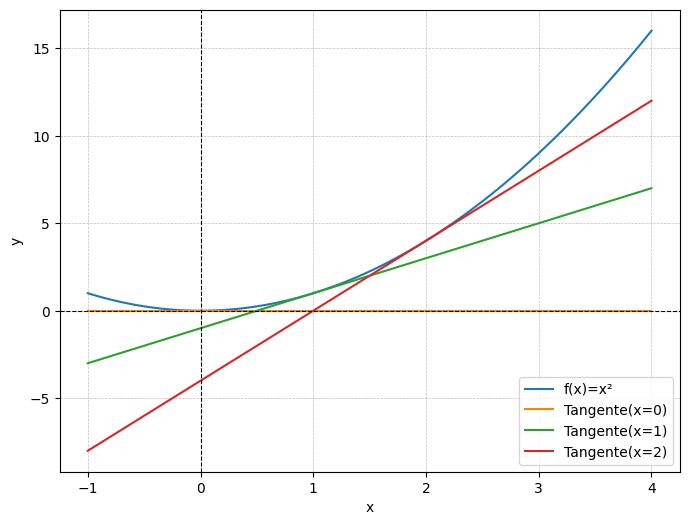

In [47]:
class QuadratF(Plottable):
    def __str__(self):
        return "f(x)=x²"
    def __call__(self, x : float):
        return x ** 2

class Tangent0(Plottable):
    def __str__(self):
        return "Tangente(x=0)"
    def __call__(self, x : float):
        return 0

class Tangent1(Plottable):
    def __str__(self):
        return "Tangente(x=1)"
    def __call__(self, x : float):
        return 2 * x - 1

class Tangent2(Plottable):
    def __str__(self):
        return "Tangente(x=2)"
    def __call__(self, x : float):
        return 4 * x - 4

Plottable.multi_plot([QuadratF(), Tangent0(), Tangent1(), Tangent2()], -1.0, 4.0)

### Ableitungsfunktionen berechnen

<div class="aufgabe">
    <h3>Berechnung von Ableitungen</h3>
    Berechnen Sie mit Ihren bestehenden Kenntnissen möglichst viele der folgenden Ableitungen:
    <ul>
    <li>$c(x)=42$</li>
    <li>$f(x)=7\cdot x$</li>
    <li>$g(x)=x^2$</li>
    <li>$h(x)=e^x$</li>
    <li>$i(x)=sin(x)$</li>
    <li>$j(x)=cos(x)$</li>
    <li>$k(x)=\sqrt{x}$</li>
    <li>$l(x)=\frac{1}{x}$</li>
    <li>$m(x)=3x^3+4x^2+5x+6$</li>
    <li>$n(x)=e^x \cdot x$</li>
    <li>$o(x)=sin(x) \cdot cos(x)$</li>
    <li>$p(x)=sin(e^x)$</li>
    </ul>
</div>

c'(x) = 0<br>
f'(x) = 7<br>
g'(x) = 2x<br>
h'(x) = e^x<br>
i'(x) = cos(x)<br>
j'(x) = -sin(x)<br>
k'(x) = 1/(2*sqrt(x))<br>
l'(x) = -1/(x^2)<br>
m'(x) = 9x^2 + 8x + 5<br>
n'(x) = e^x * (x + 1)<br>
o'(x) = cos(x)^2 - sin(x)^2<br>
p'(x) = cos(e^x) * e^x<br>

### Abstrakte Basisklasse für Funktionen

Wir möchten im Folgenden verschiedene Funktionen von $\mathbb{R}$ auf $\mathbb{R}$ und deren Ableitungen implementieren. 

Dazu verwenden wir eine abstrakte Basisklasse `MFunc`. Sie enthält folgende Methoden und Attribute:

- <tt>\_\_init\_\_</tt> Konstruktor, der den Namen, einen konstanten Faktor, und den Variablennamen erhält.
- <tt>_factor_str</tt> Hilfsfunktion für das Formatieren von Faktoren (z.B. `-1x -> -x`).
- <tt>\_\_call\_\_</tt> gibt den Funktionswert für einen Eingabewert zurück.
- <tt>clone</tt> erzeugt eine *deep copy* der Funktion.
- <tt>call_verbose</tt> gibt einen schön formatierten Output für eine Funktionsberechnung.

<div class="satz">
    <h3>Faktorregel</h3>
    Ein konstanter Faktor bleibt bei der Ableitung erhalten:<br>
    $$ f(x)=c \cdot g(x), \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot g'(x)$$
</div>

Daher können wir den `factor` in der Basisklasse zentral behandeln.

Alle Unterklassen müssen folgende abstrakte Methoden implementieren:

- <tt>_str_internal(self) -> str</tt> gibt die Berechnungsvorschrift der Funktion (ohne den Faktor) zurück.
- <tt>_call_internal(self, x: float) -> float</tt> berechnet den Funktionswert (ohne den Faktor).
- <tt>derive(self) -> MFunc</tt> gibt die Ableitungsfunktion der Funktion zurück (keinen konkreten Wert!).

In [49]:
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
import copy

class MFunc(ABC, Plottable):
    '''
    Abstrakte Basisklasse für Funktionen.
    '''
    def __init__(self, name: str = '', factor: float = 1.0, operand : str ="x"):
        '''
        Konstruktor mit Funktionsname (z.B. f), konstantem Faktor, und Operand.
        '''
        self.name = name
        self.factor = factor
        self.operand = operand

    def _factor_str(self, factor: float) -> str:
        '''
        Hilfsmethode, die einen Faktor in einen String umwandelt:
        Faktor 1.0 kann weggelassen werden.
        Faktor -1.0 kann als Minus geschrieben werden.
        Alle anderen Faktoren werden als Zahl angegeben.
        '''
        return f"{'' if factor == 1.0 else '-' if factor == -1.0 else factor}"
    
    @abstractmethod
    def _str_internal(self) -> str:
        '''
        Wandelt die eigentliche Funktion in einen String um, ohne Faktor und Funktionssymbol.
        z.B. __str__: f(x)=3.0cos(x) -> _str_internal: cos(x)
        '''
        pass

    def __str__(self) -> str:
        '''
        Wandelt die Funktion in einen menschenlesbaren String um.
        '''
        return f"{self.name}({self.operand})={self._factor_str(self.factor)}{self._str_internal()}"

    @abstractmethod
    def _call_internal(self, x: float) -> float:
        '''
        Berechnet die eigentliche Funktion ohne Faktor.
        Ein Error wird als NaN (not a number) interpretiert.
        '''
        pass
    
    def __call__(self, x: float) -> float:
        '''
        Berechnet den Funktionswert an Stelle x.
        '''
        result = 0
        try:
            result = self._call_internal(x)
        except: #z.B. durch Teilen durch Null
            print(f"Error at {self} {x}")
            return math.nan
        return self.factor * result

    @abstractmethod
    def derive(self):
        '''
        Gibt die Ableitungsfunktion dieser FUnktion zurück.
        '''
        pass

    def clone(self):
        '''
        Erzeugt eine Kopie der funktion und aller ihrer Attribute.
        '''
        return copy.deepcopy(self)
    
    def call_verbose(self, x: float):
        '''
        Berechnet den Funktionswert an Stelle x und gibt ihn schön als String formatiert zurück.
        '''
        return f"{self.name}({x})={self(x)}"

### Konstante Funktionen

`ConstFunc` ist ein Beispiel für eine Unterklasse. Sie beschreibt Funktionen mit konstantem Funktionswert.

Die Ableitung einer solchen Funktion hat ebenfalls einen konstanten Funktionswert:


<div class="satz">
    <h3>Konstantenregel</h3>
    Ein konstanter Faktor fällt bei der Ableitung weg:<br>
    $$ f(x)=c, \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = 0$$
</div>



In [50]:
import unittest

class ConstFunc(MFunc):

    def _str_internal(self) -> str:
        return f"{'1.0' if abs(self.factor) == 1.0 else ''}"

    def _call_internal(self, x: float) -> float:
        '''
        Gibt immer 1 zurück, der Faktor kommt später hinzu.
        '''
        return 1

    def derive(self):
        return ConstFunc(self.name + "'", 0.0, self.operand)

class TestConstFunc(unittest.TestCase):
    """
    Unittests für die konstante Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = ConstFunc("f", 1.0)
        self.g  = ConstFunc("g", 3.5)
        self.h  = ConstFunc("h", -2.0, 'y')
        self.k  = ConstFunc("k", 0.0)

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(1.0), 1.0)
        self.assertAlmostEqual(self.f(-10.0), 1.0)
        self.assertAlmostEqual(self.g(0.0), 3.5)
        self.assertAlmostEqual(self.h(0.0), -2.0)
        self.assertAlmostEqual(self.k(11.5), 0.0)

    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),'f(x)=1.0')
        self.assertEqual(str(self.g),'g(x)=3.5')
        self.assertEqual(str(self.h),'h(y)=-2.0')
        self.assertEqual(str(self.k),'k(x)=0.0')

    def test_03_derive(self):
        """
        Testet Ableitung.
        """
        fd= self.f.derive()
        hd= self.h.derive()
        self.assertTrue(type(fd) is ConstFunc)
        self.assertEqual(fd.factor, 0.0)
        self.assertEqual(fd.operand, 'x')
        self.assertEqual(str(fd), "f'(x)=0.0")
        self.assertTrue(type(hd) is ConstFunc)
        self.assertEqual(hd.factor, 0.0)
        self.assertEqual(hd.operand, 'y')
        self.assertEqual(str(hd), "h'(y)=0.0")


if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestConstFunc("test_01_call"))
    suite.addTest(TestConstFunc("test_02_str"))
    suite.addTest(TestConstFunc("test_03_derive"))

    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


Nun können wir die Klasse ausprobieren.

c(x)=7.0 c(2.0)=7.0
c'(x)=0.0 c'(5.0)=0.0


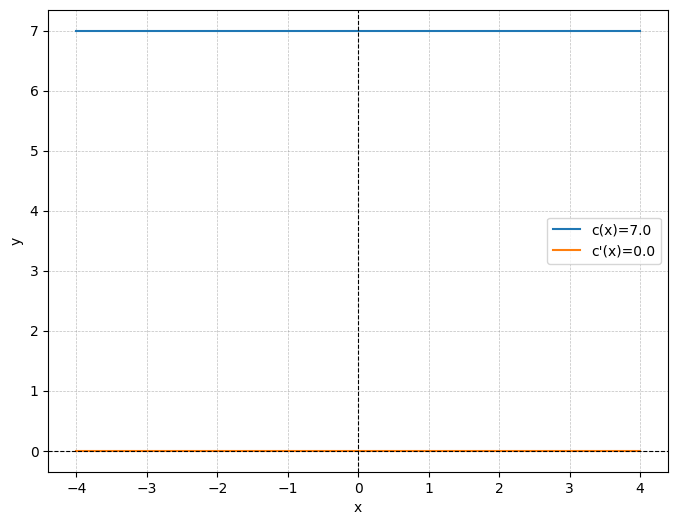

In [51]:
c = ConstFunc("c", 7.0)
cd = c.derive()
print(c, c.call_verbose(2.0))
print(cd, cd.call_verbose(5.0))

Plottable.multi_plot([c, cd], -4.0, 4.0)

### $e$-Funktion

<div class="definition">
    <h3>Eulersche Zahl und $e$-Funktion</h3>
    <img src="images/exp_x.png" width=260 align=right alt="selfmade" />
    Die Eulersche Zahl ist wie folgt definiert:<br>
    $$  e = \lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n
    $$<br>
    Sie ist eine wichtige Größe der Mathematik und wird z.B. bei der Berechnung natürlichen Wachstums eingesetzt.<br>
    Basierend auf $e$ ist die natürliche Exponentialfunktion oder $e$-Funktion definiert:<br>
    $$ f(x) = e^x $$
</div>

<div class="satz">
    <h3>Ableitung der $e$-Funktion</h3>
    $$ f(x) = e^x \rightarrow f'(x) = e^x$$<br>
    $$ f(x)= e^{c \cdot x}, \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot e^{c \cdot x}$$
</div>

Wir möchten im Folgenden die $e$-Funktion als `ExpFunc` implementieren. Ein Teil der Implementierung ist bereits vorhanden. Auch die Eulersche Zahl steht als Konstante `math.e` bereits zur Verfügung.

<div class="aufgabe">
    <h3>$e$-Funktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>ExpFunc</tt>.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Funktionen sind zu ergänzen:
    <ul>
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion unter Berücksichtigung des <tt>exp_factor</tt> (wie $c$ in obiger Formel).
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Geben Sie die Ableitung als neue <tt>ExpFunc</tt> mit korrekten Faktoren zurück.
    </li>
    </ul>
</div>

In [65]:
import math
import unittest

class ExpFunc(MFunc):
    
    def __init__(self, name: str = '', factor: float = 1.0, exp_factor: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.exp_factor = exp_factor
        
    def _str_internal(self) -> str:
        exponent = f"{self._factor_str(self.exp_factor)}{self.operand}"
        if(abs(self.exp_factor) != 1.0 or len(self.operand) > 1):
            exponent = f"({exponent})"
        return f"e^{exponent}"

    def _call_internal(self, x: float) -> float:
        # YOUR CODE HERE
        return math.exp(self.exp_factor * x) # Berechnung der Exponente

    def derive(self) -> MFunc:
        # YOUR CODE HERE
        return ExpFunc(
            self.name + "'",
            self.factor * self.exp_factor,
            self.exp_factor,
            self.operand)

class TestExpFunc(unittest.TestCase):
    """
    Unittests für die e-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = ExpFunc("f", 1.0)
        self.g  = ExpFunc("g", 2.0, 3.0)
        self.h  = ExpFunc("h", -1.0, -2.0, 'y')

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(0.0), 1.0)
        self.assertAlmostEqual(self.f(1.0), math.e)
        self.assertAlmostEqual(self.f(3.0), 20.085536923187664)
        self.assertAlmostEqual(self.g(2.0), 806.85758698547)
        self.assertAlmostEqual(self.g(-2.0), 0.004957504353332719)
        self.assertAlmostEqual(self.h(4.0), -0.00033546262790251196)
        self.assertAlmostEqual(self.h(-4.0), -2980.957987041727)

    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),'f(x)=e^x')
        self.assertEqual(str(self.g),'g(x)=2.0e^(3.0x)')
        self.assertEqual(str(self.h),'h(y)=-e^(-2.0y)')

    def test_03_derive(self):
        """
        Testet Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()
        self.assertTrue(type(fd) is ExpFunc)
        self.assertEqual(fd.name, "f'")
        self.assertEqual(fd.factor, 1.0)
        self.assertEqual(fd.exp_factor, 1.0)
        self.assertEqual(fd.operand, 'x')
        self.assertEqual(str(gd),"g'(x)=6.0e^(3.0x)")
        self.assertAlmostEqual(gd(2.5), 10848.254486736376)
        self.assertEqual(str(hd),"h'(y)=2.0e^(-2.0y)")
        self.assertAlmostEqual(hd(1.0), 0.2706705664732254)


if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestExpFunc("test_01_call"))
    suite.addTest(TestExpFunc("test_02_str"))
    suite.addTest(TestExpFunc("test_03_derive"))

    runner = unittest.TextTestRunner()
    runner.run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


Auch diese Funktion können wir uns plotten lassen:

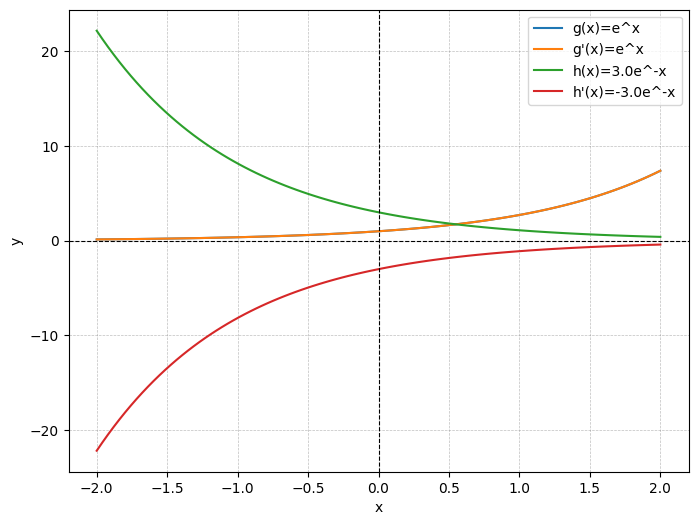

In [66]:
g = ExpFunc("g")
h = ExpFunc("h", 3.0, -1.0)

Plottable.multi_plot([g, g.derive(), h, h.derive()], -2, 2, 100)

### Sinus und Cosinus

Als nächstes möchten wir Funktionen für *Sinus* und *Cosinus* implementieren. Die eigentliche Berechnung müssen Sie nicht selbst vornehmen, `math.sin` und `math.cos` gibt es bereits.

<div class="satz">
    <h3>Ableitung von Sinus und Cosinus</h3>
    
    $$ f(x) = sin(x) \rightarrow f'(x) = cos(x)$$<br>
    $$ f(x) = sin(c \cdot x), \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot cos(c \cdot x)$$<br>
    $$ f(x) = cos(x) \rightarrow f'(x) = -sin(x)$$<br>
    $$ f(x) = cos(c \cdot x), \text{ mit } c \in \mathbb{R} \rightarrow f'(x) = c \cdot -sin(c \cdot x)$$
</div>

<div class="aufgabe">
    <h3>Sinus- und Cosinus-Funktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>SinFunc</tt>.<br>
    Erstellen Sie danach analog eine Klasse <tt>CosFunc</tt>.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!
</div>


In [72]:
import math
import unittest

class SinFunc(MFunc):

    def __init__(self, name: str = '', factor: float = 1.0, sin_factor: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.sin_factor = sin_factor
        
    def _str_internal(self) -> str:
        return f"sin({self._factor_str(self.sin_factor)}{self.operand})"

    def _call_internal(self, x: float) -> float:
        # YOUR CODE HERE
        #raise NotImplementedError()
        return math.sin(self.sin_factor * x)  # Berechnung des Sinuswerts

    def derive(self) -> MFunc:
        # YOUR CODE HERE
        #raise NotImplementedError()
        return CosFunc(
            self.name + "'",
            self.factor * self.sin_factor,
            self.sin_factor,
            self.operand)


class CosFunc(MFunc):
    # YOUR CODE HERE
    #raise NotImplementedError()
    def __init__(self, name: str = '', factor: float = 1.0, cos_factor: float = 1.0, operand : str ="x"):
        super().__init__(name, factor, operand)
        self.cos_factor = cos_factor

    def _str_internal(self) -> str:
        return f"cos({self._factor_str(self.cos_factor)}{self.operand})"

    def _call_internal(self, x: float) -> float:
        return math.cos(self.cos_factor * x)  # Berechnung des Cosinuswerts

    def derive(self) -> MFunc:
        return SinFunc(
            self.name + "'",
            -self.factor * self.cos_factor,
            self.cos_factor,
            self.operand)


class TestSinCos(unittest.TestCase):
    """
    Unittests für die Sinus- und Cosinus-Funktionen.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.fs  = SinFunc("f", 1.0)
        self.gs  = SinFunc("g", 3.0, 2.0, 'y')
        self.fc  = CosFunc("f", 1.0, 1.0)
        self.gc  = CosFunc("g", -3.0, -2.0, 'y')

    def test_01_call_sin(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.fs(0.0), 0.0)
        self.assertAlmostEqual(self.fs(math.pi/2), 1.0)
        self.assertAlmostEqual(self.fs(math.pi), 0.0)
        self.assertAlmostEqual(self.fs(1.0), 0.8414709848078965)
        self.assertAlmostEqual(self.gs(0.0), 0.0)
        self.assertAlmostEqual(self.gs(-math.pi/2), 0.0)
        self.assertAlmostEqual(self.gs(-math.pi), 0.0)
        self.assertAlmostEqual(self.gs(1.0), 2.727892280477045)

    def test_02_call_cos(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.fc(0.0), 1.0)
        self.assertAlmostEqual(self.fc(math.pi/2), 0.0)
        self.assertAlmostEqual(self.fc(math.pi), -1.0)
        self.assertAlmostEqual(self.gc(1.0), 1.2484405096414273)
        

    def test_03_str_sin(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.fs),'f(x)=sin(x)')
        self.assertEqual(str(self.gs),'g(y)=3.0sin(2.0y)')

    def test_04_str_cos(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.fc),'f(x)=cos(x)')
        self.assertEqual(str(self.gc),'g(y)=-3.0cos(-2.0y)')
    
    def test_05_derive_once(self):
        """
        Testet Ableitung.
        """
        fsd= self.fs.derive()
        gsd= self.gs.derive()
        fcd= self.fc.derive()
        gcd= self.gc.derive()
        self.assertTrue(type(fsd) is CosFunc)
        self.assertEqual(fsd.factor, 1.0)
        self.assertEqual(fsd.cos_factor, 1.0)
        self.assertEqual(fsd.operand, 'x')
        self.assertEqual(fsd._str_internal(), self.fc._str_internal())
        self.assertEqual(str(gsd), "g'(y)=6.0cos(2.0y)")
        self.assertEqual(str(fcd), "f'(x)=-sin(x)")
        self.assertEqual(str(gcd), "g'(y)=-6.0sin(-2.0y)")

    def test_06_derive_multiple(self):
        fsd= self.fs.derive().derive().derive().derive()
        fcd= self.fc.derive().derive().derive().derive()
        self.assertEqual(str(fsd), "f''''(x)=sin(x)")
        self.assertEqual(str(fcd), "f''''(x)=cos(x)")

        gsd= self.gs.derive().derive()
        gcd= self.gc.derive().derive()
        self.assertEqual(str(gsd), "g''(y)=-12.0sin(2.0y)")
        self.assertEqual(str(gcd), "g''(y)=12.0cos(-2.0y)")

        

if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestSinCos("test_01_call_sin"))
    suite.addTest(TestSinCos("test_02_call_cos"))
    suite.addTest(TestSinCos("test_03_str_sin"))
    suite.addTest(TestSinCos("test_04_str_cos"))
    suite.addTest(TestSinCos("test_05_derive_once"))
    suite.addTest(TestSinCos("test_06_derive_multiple"))

    runner = unittest.TextTestRunner()
    runner.run(suite)


......
----------------------------------------------------------------------
Ran 6 tests in 0.006s

OK


Auch die Funktionsgraphen von Sinus und Cosinus lassen sich mittels Plottable zeichnen.

Leitet man $sin(x)$ viermal ab, ist das Ergebnis übrigens wieder $sin(x)$.

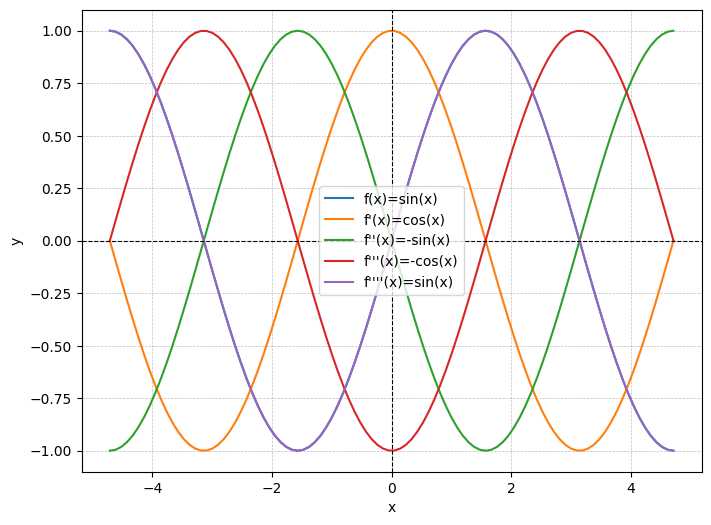

In [73]:
f = SinFunc("f")#, 1, 2
Plottable.multi_plot([f, 
                      f.derive(),
                      f.derive().derive(),
                      f.derive().derive().derive(),
                      f.derive().derive().derive().derive()],
                    -math.pi * 1.5, math.pi  * 1.5, 100)

### Potenzfunktion

Die nächsten Funktionen sind Potenzfunktionen, also Funktionen, in dem x mit einem Exponenten kombiniert wird, z.B. $x^3$.


<div class="satz">
    <h3>Potenzregel</h3>
    <img src="images/x_cubed.png" width=220 align=right alt="selfmade" />
    $$ f(x) = x^n, \text{ mit } n \in \mathbb{N}^{+} \rightarrow f'(x) = n \cdot x^{n-1}$$<br>
    Das heißt insbesondere:
    $$ f(x) = x \rightarrow f'(x) = 1 \cdot x^0 = 1 \cdot 1 = 1 $$<br>
</div>

<div class="aufgabe">
    <h3>Potenzfunktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>PowerFunc</tt>.<br>
    Beachten Sie, dass die Ableitung entweder eine Potenz- oder eine Konstantenfunktion sein kann.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!
</div>


In [88]:
import unittest

class PowerFunc(MFunc):
    def __init__(self, name: str = '', factor: float = 1.0, exponent: float = 1.0, operand: str = "x"):
        super().__init__(name, factor, operand)
        self.exponent = exponent

    def _str_internal(self) -> str:
        if self.exponent == 1.0:
            return f"{self.operand}"
        else:
            return f"{self.operand}^{self.exponent}"

    def _call_internal(self, x: float) -> float:
        return x ** self.exponent

    def derive(self):
        # Ableitung: f(x) = a*x^n -> f'(x) = a*n*x^(n-1)
        if self.exponent == 1.0:
            # Ableitung einer linearen Funktion ist eine Konstante
            return ConstFunc(self.name + "'", self.factor * self.exponent, self.operand)
        elif self.exponent == 0.0:
            # Ableitung einer Konstanten ist 0
            return ConstFunc(self.name + "'", 0.0, self.operand)
        else:
            return PowerFunc(self.name + "'", self.factor * self.exponent, self.exponent - 1, self.operand)

class TestPowerFunc(unittest.TestCase):
    """
    Unittests für die Potenz-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = PowerFunc("f", 1.0, 2.0)
        self.g  = PowerFunc("g", -3.0, 1.0)
        self.h  = PowerFunc("h", 0.5, 3.0, 'y')

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(1.0), 1.0)
        self.assertAlmostEqual(self.f(3.0), 9.0)
        self.assertAlmostEqual(self.f(-2.5), 6.25)
        self.assertAlmostEqual(self.g(0.0), 0.0)
        self.assertAlmostEqual(self.g(2.0), -6.0)
        self.assertAlmostEqual(self.h(0.5), 0.0625)
        self.assertAlmostEqual(self.h(-1.5), -1.6875)
        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),'f(x)=x^2.0')
        self.assertEqual(str(self.g),'g(x)=-3.0x')
        self.assertEqual(str(self.h),'h(y)=0.5y^3.0')

    def test_03_derive_to_power(self):
        """
        Testet Ableitung auf eine andere Potenzfunktion.
        """
        fd= self.f.derive()
        hd= self.h.derive()
        hdd= hd.derive()

        self.assertTrue(type(fd) is PowerFunc)
        self.assertEqual(fd.factor, 2.0)
        self.assertEqual(fd.exponent, 1.0)
        self.assertEqual(fd.operand, 'x')
        self.assertEqual(str(fd), "f'(x)=2.0x")
        self.assertEqual(str(hd), "h'(y)=1.5y^2.0")
        self.assertEqual(str(hdd), "h''(y)=3.0y")

    def test_04_derive_to_const(self):
        """
        Testet Ableitung zur Konstantenfunktion.
        """
        gd= self.g.derive()
        gdd= self.g.derive().derive()
        fdd= self.f.derive().derive()
        self.assertTrue(type(gd) is ConstFunc)
        self.assertTrue(type(gdd) is ConstFunc)
        self.assertTrue(type(fdd) is ConstFunc)
        self.assertEqual(str(gd), "g'(x)=-3.0")
        self.assertEqual(str(gdd), "g''(x)=0.0")
        self.assertEqual(str(fdd), "f''(x)=2.0")

if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestPowerFunc("test_01_call"))
    suite.addTest(TestPowerFunc("test_02_str"))
    suite.addTest(TestPowerFunc("test_03_derive_to_power"))
    suite.addTest(TestPowerFunc("test_04_derive_to_const"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.005s

OK


Durch mehrfaches Ableiten lässt sich gut erkennen, wie der *Grad* (größter Exponent) der Funktion sinkt.

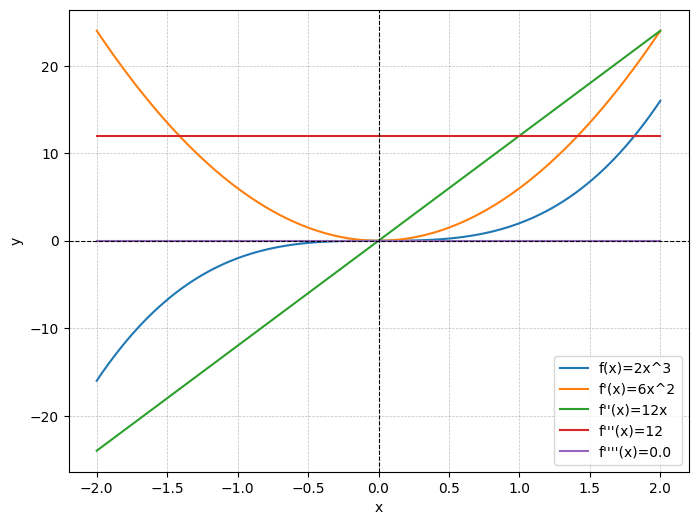

In [78]:
f = PowerFunc("f", 2, 3)
Plottable.multi_plot([f,
                      f.derive(),
                      f.derive().derive(),
                      f.derive().derive().derive(),
                      f.derive().derive().derive().derive()],
                    -2, 2)

### Summenregel

Viele Funktionen setzen sich aus mehreren der bisher implementierten Funktionen zusammen. Eine wichtige Klasse sind Polynome, also Funktionen der Form:

$$
f(x)= c_0 \cdot x^0 + c_1 \cdot x^1 + c_2 \cdot x^2 + ... + c_{n-1} \cdot x^{n-1} + c_{n} \cdot x^{n}, \text{ mit } c_{0 \ldots n} \in \mathbb{R}
$$

Für die Ableitung solche einer Funktion hilft eine neue Ableitungsregel.

<div class="satz">
    <h3>Summenregel</h3>
    $$ f(x) = (f_1{x} + f_2{x} + \ldots + f_n{x}) \rightarrow f'(x) = (f_1'{x} + f_2'{x} + \ldots + f_n'{x})$$<br>
</div>

Wir können also die Terme der Summe einfach einzeln ableiten.


<div class="aufgabe">
    <h3>Summen-Funktion</h3>
    <img src="images/x_plus_sin.png" width=260 align=right alt="selfmade" />
    Ergänzen Sie den untenstehenden Code der Klasse <tt>SumFunc</tt>, die eine Summe aus mehreren anderen Funktionen (<tt>terms</tt>) ist.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Vorgaben gelten:
    <ul>
    <li><tt>_str_internal(self) -> str</tt>: Wir umgeben die Summe mit Klammern, um später Punkt-vor-Strich nicht zu verletzen (z.B. <tt>(sin(x)+cos(x))</tt>)
    </li>    
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion durch Aufruf der einzelnen Terme.
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Terme mit Faktor 0 fallen weg. Hat die Ableitung nur einen Summanden, geben Sie diesen direkt als Ableitung zurück. Bleibt kein Term übrig, geben Sie eine passende Konstantenfunktion zurück.
    </li>
    </ul>
</div>

<details class="hint">
<summary></summary>
    Ob ein Plus oder Minus kommt, hängt vom Vorzeichen des Faktors ab.
    <details class="nexthint">
    <summary></summary>
       Bei der Ableitung fallen Terme mit Faktor 0.0 weg.
        <details class="nexthint">
        <summary></summary>
           Es gibt drei Fälle, welche Art von Func die Ableitung liefert, abhängig von der Anzahl der verbleibenden Terme.
        </details>
    </details>
</details>


In [80]:
import unittest

class SumFunc(MFunc):

    def __init__(self, name: str, terms: [MFunc]):
        super().__init__(name)
        self.terms = []
        for term in terms:
            self.terms.append(term.clone())
        #Bonus-Aufgabe
        # YOUR CODE HERE
        raise NotImplementedError()

    # YOUR CODE HERE
    raise NotImplementedError()

class TestSumFunc(unittest.TestCase):
    """
    Unittests für die zusammengestzte Summen-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f  = SumFunc("f",[PowerFunc("", 1.0, 3.0), PowerFunc("", 1.0, 2.0), PowerFunc("", 1.0, 1.0)])
        self.g  = SumFunc("g",[PowerFunc("", 2.5, 2.0), PowerFunc("", -4.0, 1.0), ConstFunc("", 3.0)])
        self.h  = SumFunc("h", [SinFunc(), CosFunc("",3.0, 0.5), ConstFunc("", -1.0)])
        self.k  = SumFunc("k", [PowerFunc("", 1.0, 4.0), PowerFunc("", 5.0, 1.0)])

    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(2.0), 14.0)
        self.assertAlmostEqual(self.f(3.0), 39.0)
        self.assertAlmostEqual(self.g(0.0), 3.0)
        self.assertAlmostEqual(self.g(3.0), 13.5)
        self.assertAlmostEqual(self.g(-1.0), 9.5)
        self.assertAlmostEqual(self.h(math.pi), -1.0)
        self.assertAlmostEqual(self.h(math.pi/2), 2.121320343559643)
        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),"f(x)=(x^3.0+x^2.0+x)")
        self.assertEqual(str(self.g),"g(x)=(2.5x^2.0-4.0x+3.0)")
        self.assertEqual(str(self.h),"h(x)=(sin(x)+3.0cos(0.5x)-1.0)")

    def test_03_derive_once(self):
        """
        Testet einmalige Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()
        
        self.assertTrue(type(fd) is SumFunc)
        self.assertEqual(fd.factor, 1.0)
        self.assertEqual(fd.operand, 'x')
        self.assertIn("f'(x)=(", str(fd))
        self.assertIn("3.0x^2.0", str(fd))
        self.assertIn("2.0x", str(fd))
        self.assertIn("1.0", str(fd))
        self.assertAlmostEqual(fd(3.0), 34.0)
        
        self.assertEqual(len(gd.terms), 2)
        self.assertNotIn("0.0", str(gd))
        self.assertIn("4.0", str(gd))
        self.assertIn("5.0x", str(gd))
        self.assertAlmostEqual(gd(-2.0), -14.0)

        self.assertIn("cos(x)", str(hd))
        self.assertIn("-1.5sin(0.5x)", str(hd))
        self.assertAlmostEqual(hd(math.pi), -2.5)
        
        #self.assertEqual(str(fd), "f'(x)=2.0x")
        #self.assertEqual(str(hd), "h'(y)=1.5y^2.0")
        #self.assertEqual(str(hdd), "h''(y)=3.0y")

    def test_04_derive_multiple(self):
        """
        Testet mehrfache Ableitung und Wegfall von Konstanten.
        """
        
        fdd= self.f.derive().derive()
        fddd= self.f.derive().derive().derive()
        kdd= self.k.derive().derive()
        
        self.assertEqual(len(fdd.terms), 2)
        self.assertIn("f''(x)=(", str(fdd))
        self.assertIn("6.0x", str(fdd))
        self.assertIn("+2.0", str(fdd))

        self.assertTrue(type(fddd) is ConstFunc)
        self.assertEqual(str(fddd), "f'''(x)=6.0")

        self.assertTrue(type(kdd) is PowerFunc)
        self.assertEqual(str(kdd), "k''(x)=12.0x^2.0")

    #Bonus-Aufgabe
    def test_11_simplify(self):
        """
        Testet Die Vereinfachung/Zusammenfasung der Summe.
        """
        s1 = SumFunc("s", [ConstFunc("", 17.0), ConstFunc("", 4.0)])
        self.assertEqual(len(s1.terms), 1)
        self.assertEqual(str(s1), "s(x)=(21.0)")
        self.assertEqual(s1(0.0), 21.0)

        s2 = SumFunc("s", [PowerFunc("", 3.0, 2.0), PowerFunc("", 4.0, 3.0), PowerFunc("", 1.0, 2.0), PowerFunc("", -1.0, 3.0)])
        self.assertEqual(len(s2.terms), 2)
        self.assertIn("4.0x^2.0", str(s2))
        self.assertIn("3.0x^3.0", str(s2))
        self.assertEqual(s2(3.0), 117.0)

        s3 = SumFunc("s", [PowerFunc("", 1.0, 3.0), PowerFunc("", -1.0, 3.0), PowerFunc("", 2.0, 1.0)])
        self.assertEqual(len(s3.terms), 1)
        self.assertEqual(str(s3), "s(x)=(2.0x)")
        self.assertEqual(s3(3.0), 6.0)

        s4 = SumFunc("s", [SumFunc("", [PowerFunc("", 1.0, 3.0), PowerFunc("", 2.0, 1.0)]), PowerFunc("", -1.0, 3.0), PowerFunc("", 1.0, 2.0)])
        self.assertEqual(len(s4.terms), 2)
        self.assertIn("2.0x", str(s4))
        self.assertIn("x^2.0", str(s4))
        self.assertEqual(s4(3.0), 15.0)
      
if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestSumFunc("test_01_call"))
    #suite.addTest(TestSumFunc("test_02_str"))
    #suite.addTest(TestSumFunc("test_03_derive_once"))
    #suite.addTest(TestSumFunc("test_04_derive_multiple"))
    #Bonus-Aufgabe
    #suite.addTest(TestSumFunc("test_11_simplify"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


<div class="aufgabe">
    <img src="images/bonusstar223679.png" width=80 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />
    <h3> Bonus: Summen-Vereinfachung</h3>
    Ergänzen Sie <tt>SumFunc</tt>, sodass im Konstruktor die Summe vereinfacht wird:<br>
    Fassen Sie gleiche Terme (mit evtl. verschiedenen Faktoren) zusammen, z.B. (<tt>(cos(x)+2.0cos(x)) -> (3.0cos(x))</tt>)<br>
    Lösen Sie verschachtelte Summen auf, z.B. (<tt>((cos(x)+sin(x))+2.0cos(x)) -> (sin(x)+3.0cos(x))</tt>)<br>
    Die Reihenfolge der vereinfachten Summanden ist nicht vorgegeben.<br>
    Stellen Sie sicher, dass der zugehörige Test durchläuft!<br>
</div>

<details class="hint">
<summary></summary>
    Man kombiniert kompatible Summanden, indem man ihre Faktoren aufeinanderaddiert.
    <details class="nexthint">
    <summary></summary>
       Für die Kombination verschachtelter Summen brauchen Sie Rekursion.
        <details class="nexthint">
        <summary></summary>
           Verwenden Sie ein Dictionary, um kompatible Summanden zu finden.
        </details>
    </details>
</details>

Mit der Summe lassen sich auch komplexe Funktionen beschreiben und ableiten.

In [ ]:
f = SumFunc("f", [ConstFunc("", -1), SinFunc(), CosFunc("",-1, 0.5)])
print(f)
Plottable.multi_plot([f, f.derive(), f.derive().derive()], -10, 10, 1000)

### Produktregel

Eine weitere Art, Funktionen zusammenzusetzen, ist die Multiplikation.

<div class="satz">
    <h3>Produktregel</h3>
    $$ f(x) = g(x) \cdot h(x) \rightarrow f'(x) = g'(x) \cdot h(x) + g(x) \cdot h'(x)$$<br>
</div>

Aus einem Produkt entsteht nach der Ableitung also eine Summe aus zwei Produkten.

<div class="aufgabe">
    <h3>Produkt-Funktion</h3>
    <img src="images/sin_times_x_cubed.png" width=260 align=right alt="selfmade" />
    Ergänzen Sie den untenstehenden Code der Klasse <tt>ProdFunc</tt>, die ein Produkt aus zwei anderen Funktionen (<tt>left/right</tt>) ist.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Vorgaben gelten:
    <ul>
    <li><tt>__init__(self, name: str, left: MFunc, right: MFunc, factor: float = 1.0):</tt>: Alle Faktoren aus den beiden übergebenen Funktionen sollen als Faktor in die neue <tt>ProdFunc</tt> gezogen werden  (z.B. <tt>2.0sin(x)*3.0x->6.0sin(x)*x</tt>)
    </li>    
    <li><tt>_str_internal(self) -> str</tt>: Wir verwenden keine zusätzlichen Klammern, da Punkt-vor-Strich gilt.
    </li>    
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion durch Aufruf von <tt>left/right</tt>.
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Das Ergebnis ist immer eine <tt>SumFunc</tt> aus zwei <tt>ProdFunc</tt>. Die Tests erwarten die Reihenfolge aus der Potenzregel.
    </li>
    </ul>
</div>

<details class="hint">
<summary></summary>
Faktoren werden durch Multiplikation miteinander kombiniert.
    <details class="nexthint">
    <summary></summary>
       Wenn Sie wissen, dass die beiden Elemente left und right factor=1.0 haben, wird die Ausgabe leichter.
        <details class="nexthint">
        <summary></summary>
           Erstellen Sie beim Ableiten die einzelnen Komponenten der Produktregel und setzen Sie sie dann zusammen.
        </details>
    </details>
</details>


In [90]:
import unittest

class ProdFunc(MFunc):
    def __init__(self, name: str, left: MFunc, right: MFunc, factor: float = 1.0):
        # Extract factors from the input functions and combine them
        combined_factor = factor * left.factor * right.factor
        super().__init__(name, combined_factor, left.operand)

        # Create copies with factor = 1.0 for simpler internal handling
        self.left = left.clone()
        self.left.factor = 1.0
        self.right = right.clone()
        self.right.factor = 1.0

    def _str_internal(self) -> str:
        # No need for extra parentheses due to operator precedence
        return f"{self.left._str_internal()}*{self.right._str_internal()}"

    def _call_internal(self, x: float) -> float:
        # Compute the product of the functions
        return self.left._call_internal(x) * self.right._call_internal(x)

    def derive(self) -> MFunc:
        # Apply the product rule: (f*g)' = f'*g + f*g'
        # First term: f'*g
        first_term = ProdFunc(
            "",
            self.left.derive(),
            self.right.clone(),
            1.0
        )

        # Second term: f*g'
        second_term = ProdFunc(
            "",
            self.left.clone(),
            self.right.derive(),
            1.0
        )

        # Return the sum of the two terms
        return SumFunc(f"{self.name}'", [first_term, second_term])

class TestProdFunc(unittest.TestCase):
    """
    Unittests für die zusammengestzte Produkt-Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f = ProdFunc("f", PowerFunc("", 1.0, 2.0), SinFunc())
        self.g = ProdFunc("g", ExpFunc("", 2.0, 2.0), CosFunc("", 3.0))
        self.h = ProdFunc("h", SinFunc("", -1.0, 0.5), PowerFunc("", -3.0, 1.5))
        
    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(2.0), 3.637189707302727)
        self.assertAlmostEqual(self.f(3.0), 1.2700800725388048)
        self.assertAlmostEqual(self.g(2.0), -136.32508450571538)
        self.assertAlmostEqual(self.g(1.0), 23.953944290647627)
        self.assertAlmostEqual(self.g(-1.0), 0.43873179358835784)
        self.assertAlmostEqual(self.g(2.5), -713.4015292690831)

        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),"f(x)=x^2.0*sin(x)")
        self.assertEqual(str(self.g),"g(x)=6.0e^(2.0x)*cos(x)")
        self.assertEqual(str(self.h),"h(x)=3.0sin(0.5x)*x^1.5")

    def test_03_derive(self):
        """
        Testet einmalige Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()

        self.assertTrue(type(fd) is SumFunc)
        self.assertEqual(len(fd.terms), 2)
        self.assertIn("f'(x)=(", str(fd))
        self.assertIn("2.0x*sin(x)", str(fd))
        self.assertIn("x^2.0*cos(x)", str(fd))
        
        self.assertIn("12.0e^(2.0x)*cos(x)", str(gd))
        self.assertIn("-6.0e^(2.0x)*sin(x)", str(gd))
        self.assertAlmostEqual(gd(0.0), 12.0)

        self.assertIn("1.5cos(0.5x)*x^1.5", str(hd))
        self.assertIn("4.5sin(0.5x)*x^0.5", str(hd))
        self.assertAlmostEqual(hd(math.pi), 7.976042329074822)

    
    #Bonus-Aufgabe
    def test_11_simplify(self):
        """
        Testet Die Vereinfachung/Zusammenfassung des Produkts.
        Benötigt Bonusaufgabe NestedFunc!
        """
        p1 = ProdFunc.simplify(ProdFunc("p", ConstFunc("", 17.0), ConstFunc("", 4.0)))
        self.assertTrue(type(p1) is ConstFunc)
        self.assertAlmostEqual(p1.factor, 68.0)

        p2 = ProdFunc.simplify(ProdFunc("p", PowerFunc("", 1.0, 2.0), PowerFunc("", 1.0, 3.0)))
        self.assertTrue(type(p2) is PowerFunc)
        self.assertAlmostEqual(p2.exponent, 5.0)

        p3 = ProdFunc.simplify(ProdFunc("p", ProdFunc("s", SinFunc("", 2.0, 1.0), ConstFunc("", 4.0)), PowerFunc("", -2.0, 3.0)))
        self.assertTrue(type(p3) is ProdFunc)
        self.assertAlmostEqual(p3.factor, -16.0)
        self.assertTrue(type(p3.left) in (SinFunc, PowerFunc))
        self.assertTrue(type(p3.right) in (SinFunc, PowerFunc))
        self.assertAlmostEqual(p3(1.0), -13.463535756926344)

        p4 = ProdFunc.simplify(ProdFunc("p", SinFunc("", 1.0, 2.0), SinFunc("", 1.0, 2.0)))
        self.assertTrue(type(p4) is NestedFunc)
        self.assertEqual(str(p4), "p(x)=sin(2.0x)^2")

     

    def test_12_derive_and_simplify(self):
        """
        Testet mehrfache Ableitung und simplify.
        """
        fdd= self.f.derive().derive()
        gddd= self.g.derive().derive().derive()
        hdd= self.h.derive().derive()
        
        self.assertEqual(len(fdd.terms), 3)
        self.assertIn("f''(x)=(", str(fdd))
        self.assertIn("2.0sin(x)", str(fdd))
        self.assertIn("4.0x*cos(x)", str(fdd))
        self.assertIn("x^2.0*sin(x)", str(fdd))

        self.assertEqual(len(gddd.terms), 2)
        self.assertIn("12.0e^(2.0x)*cos(x)", str(gddd))
        self.assertIn("-66.0e^(2.0x)*sin(x)", str(gddd))

        self.assertEqual(len(hdd.terms), 3)
        self.assertIn("-0.75sin(0.5x)*x^1.5", str(hdd))
        self.assertIn("4.5cos(0.5x)*x^0.5", str(hdd))
        self.assertIn("2.25sin(0.5x)*x^-0.5", str(hdd))


if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestProdFunc("test_01_call"))
    #suite.addTest(TestProdFunc("test_02_str"))
    #suite.addTest(TestProdFunc("test_03_derive"))
    #Bonus-Aufgabe
    #suite.addTest(TestProdFunc("test_11_simplify"))
    #suite.addTest(TestProdFunc("test_12_derive_and_simplify"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


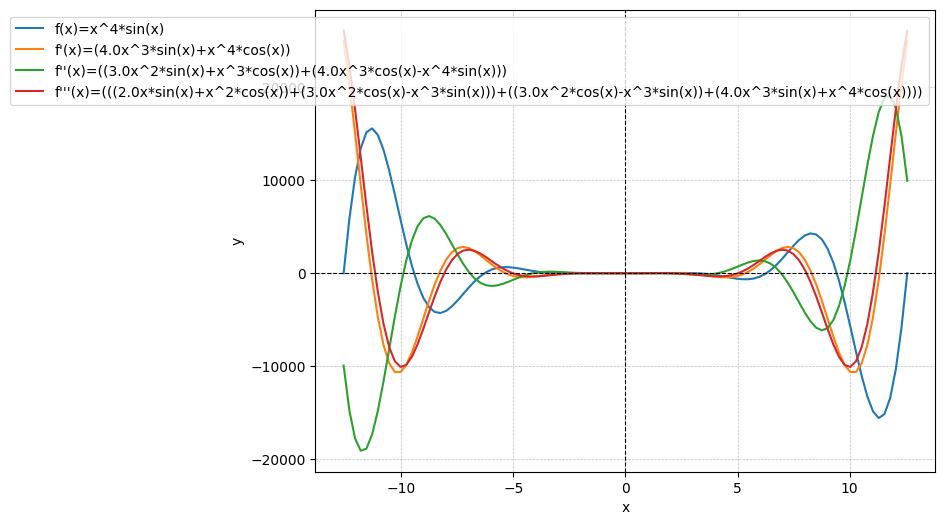

In [91]:
f = ProdFunc("f", PowerFunc("",1,4), SinFunc())
Plottable.multi_plot([f, 
                      f.derive(), 
                      f.derive().derive(),
                      f.derive().derive().derive()],
                     -4.0*math.pi, 4.0*math.pi)

### Bonus: Kettenregel <img src="images/bonusstar223679.png" width=40 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />

Bei verketteten Funktionen dient eine innere Funktion als Operand einer äußeren Funktion.

<div class="satz">
    <h3>Kettenregel</h3>
    $$ f(x) = g(h(x)) \rightarrow f'(x) = g'(h(x)) \cdot h'(x)$$<br>
    Mehrere der bisher gezeigten Regeln sind Spezialfälle der Kettenregel, z.B.<br>
    $$f(x) = sin(c \cdot x), \text{ mit } g(x) = sin(x), h(x) = c \cdot x$$
    $$\rightarrow g'(x) = cos(x), h'(x) = c, f'(x) = cos(h(x)) \cdot c = cos(c \cdot x) \cdot c$$
</div>

Der Schlüssel zur Anwendung der Kettenregel ist es, eine Funktion geschickt in die äußere und innere Funktion zu zerlegen.

<div class="aufgabe">
    <img src="images/bonusstar223679.png" width=80 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />
    <h3>Verkettete Funktion</h3>
    Ergänzen Sie den untenstehenden Code der Klasse <tt>NestedFunc</tt>, die eine Verkettung einer äußeren und einer inneren Funktion (<tt>outer/inner</tt>) ist.<br>
    Stellen Sie sicher, dass alle Tests durchlaufen!<br>
    Folgende Vorgaben gelten:
    <ul>
    <li><img src="images/cos_cubed.png" width=220 align=right alt="selfmade" /><tt>__init__(self, name: str, outer: MFunc, inner: MFunc, factor: float = 1.0):</tt>: Der Faktor der äußeren Funktion wird als Faktor der neuen <tt>NestedFunc</tt> verwendet. Die innere Funktion dient als Operand der äußeren. (z.B. <tt>2.0sin(x)/1.5x^2->sin(1.5x^2)</tt>)
    </li>    
    <li><tt>_str_internal(self) -> str</tt>: Die innere Funktion dient als Operand der äußeren.
    </li>    
    <li><tt>_call_internal(self, x: float) -> float</tt>: Berechnen Sie die Funktion durch Aufruf von <tt>inner</tt>, dann <tt>outer</tt>.
    </li>
    <li><tt>derive(self) -> MFunc</tt>: Das Ergebnis ist immer eine <tt>ProdFunc</tt> aus einer <tt>NestedFunc</tt> und einer anderen. Ausnahmen:<br> Ist die äußere Funktion eine Potenz, fällt sie ggfs weg (z.B. <tt>h(x)^2.0->h(x)^1.0</tt>).<br> Ist die innere Ableitung eine Konstante, wird sie stattdessen als Faktor geführt. <tt>g'(h(x))*2.0->2.0g'(h(x))
    </li>
    </ul>
</div> 

<details class="hint">
<summary></summary>
Das Attribut operand wirkt sich lediglich auf die String-Ausgabe aus. Was Sie nicht ausgeben, muss keinen schönen Operanden haben.
    <details class="nexthint">
    <summary></summary>
       Erstellen Sie bei der Ableitung genau die einzelnen Elemente der Kettenregel und setzen Sie sie neu zusammen.
        <details class="nexthint">
        <summary></summary>
           Wenn Sie die ProdFunc richtig implementiert haben, sollten die Faktoren automatisch vorne landen.
        </details>
    </details>
</details>


<div class="remark">
    <h3>Zeit zum Refactoring...</h3>
    <p>
    Mit der Kettenregel könnten wir rückblickend unsere bestehenden Klassen vereinfachen.<br>
    So könnten die "inneren" Faktoren bei Sinus, Cosinus, und $e$-Funktion wegfallen.<br>
    Im Sinne der Übung sparen wir uns das aber und lassen diese überflüssigen Faktoren stattdessen einfach ungenutzt.
    </p>
</div>

In [2]:
import unittest

class NestedFunc(MFunc):
    def __init__(self, name: str, outer: MFunc, inner: MFunc, factor: float = 1.0):
        # Get the factor from the outer function
        combined_factor = factor * outer.factor
        # Reset the outer function's factor to 1.0 since we'll use it in the new NestedFunc
        outer_clone = outer.clone()
        outer_clone.factor = 1.0

        # Store references to both functions
        self.outer = outer_clone
        self.inner = inner

        # Initialize the base class with the combined factor
        super().__init__(name, combined_factor, self.inner._str_internal())

    def _str_internal(self) -> str:
        # The inner function serves as the operand of the outer function
        inner_str = self.inner._str_internal() if isinstance(self.inner, ConstFunc) else str(self.inner)
        return f"{self.outer._str_internal().replace(self.outer.operand, inner_str)}"

    def _call_internal(self, x: float) -> float:
        # Calculate inner function's value first, then pass it to the outer function
        inner_value = self.inner(x)
        return self.outer._call_internal(inner_value)

    def derive(self) -> MFunc:
        # Apply the chain rule: f'(x) = g'(h(x)) * h'(x)
        # First part: g'(h(x))
        outer_derivative = self.outer.derive().clone()
        outer_derivative.factor = 1.0  # We'll handle the factor separately

        # Create a nested function for g'(h(x))
        derived_outer_nested = NestedFunc("", outer_derivative, self.inner)

        # Get the inner derivative h'(x)
        inner_derivative = self.inner.derive()

        # Special case: if inner derivative is a constant
        if isinstance(inner_derivative, ConstFunc):
            # Use the constant as a factor
            return NestedFunc("", outer_derivative, self.inner,
                              self.factor * inner_derivative(0))

        # Special case: if outer is a power function with exponent 1.0 after derivation
        if (isinstance(self.outer, PowerFunc) and
            isinstance(outer_derivative, PowerFunc) and
            outer_derivative.exponent == 1.0):
            # Just return the inner derivative with appropriate factor
            inner_derivative_clone = inner_derivative.clone()
            inner_derivative_clone.factor *= self.factor
            return inner_derivative_clone

        # Regular case: product of derived_outer_nested and inner_derivative
        return ProdFunc("", derived_outer_nested, inner_derivative, self.factor)

class TestNestedFunc(unittest.TestCase):
    """
    Unittests für die verkettete Funktion.
    """
    def setUp(self):
        """
        Initialisiere Variablen für den Test.
        """
        self.f = NestedFunc("f", PowerFunc("", 1.0, 2.0), SinFunc())
        self.g = NestedFunc("g", CosFunc("", 3.0), ProdFunc("",  PowerFunc("", 1.0, 1.0), ExpFunc("", 1.0, 1.0)) )
        self.h = NestedFunc("h", ExpFunc("", 2.0, 1.0), SumFunc("", [SinFunc(), CosFunc()]) )
        
    def test_01_call(self):
        """
        Testet korrekte Berechnung.
        """
        self.assertAlmostEqual(self.f(0.0), 0.0)
        self.assertAlmostEqual(self.f(1.0), 0.7080734182735712)
        self.assertAlmostEqual(self.g(2.0), -1.7938600825330877)
        self.assertAlmostEqual(self.g(-1.0), 2.7992762267946256)
        self.assertAlmostEqual(self.h(-1.0), 1.479905895481268)
        self.assertAlmostEqual(self.h(0.0), 5.43656365691809)

        
    def test_02_str(self):
        """
        Testet korrekte Ausgabe als String.
        """
        self.assertEqual(str(self.f),"f(x)=sin(x)^2.0")
        self.assertEqual(str(self.g),"g(x)=3.0cos(x*e^x)")
        self.assertEqual(str(self.h),"h(x)=2.0e^((sin(x)+cos(x)))")

    def test_03_derive(self):
        """
        Testet einmalige Ableitung.
        """
        fd= self.f.derive()
        gd= self.g.derive()
        hd= self.h.derive()

        self.assertTrue(type(fd) is ProdFunc)
        self.assertEqual(str(fd), "f'(x)=2.0sin(x)*cos(x)")
        self.assertAlmostEqual(fd(1.0), 0.9092974268256818)
        
        self.assertEqual(str(gd), "g'(x)=-3.0sin(x*e^x)*(e^x+x*e^x)")
        self.assertAlmostEqual(gd(1.0), -6.699715904670079)

        self.assertEqual(str(hd), "h'(x)=2.0e^((sin(x)+cos(x)))*(cos(x)-sin(x))")
        self.assertAlmostEqual(hd(1.0), -2.398481179592898)

    
    #Ultimative Bonus-Aufgabe - kombiniert alle bisherigen Bonus-Aufgaben (SumFunc und ProdFunc)
    def test_11_derive_and_simplify(self):
        """
        Testet mehrfache Ableitung und simplify.
        """
        fdd= self.f.derive().derive()
        gdd= self.g.derive().derive()
        hdd= self.h.derive().derive()
        
        self.assertEqual(len(fdd.terms), 2)
        self.assertEqual(str(fdd), "f''(x)=(2.0cos(x)^2-2.0sin(x)^2)")
        self.assertAlmostEqual(fdd(2.0), -1.3072872417272239)

        self.assertEqual(len(gdd.terms), 2)
        self.assertIn("-3.0cos(x*e^x)*(e^x+x*e^x)^2", str(gdd))
        self.assertIn("-3.0sin(x*e^x)*(2.0e^x+x*e^x)", str(gdd))
        self.assertAlmostEqual(gdd(1.0), 70.79266266689739)

        self.assertEqual(len(hdd.terms), 2)
        self.assertIn("2.0e^((sin(x)+cos(x)))*(cos(x)-sin(x))^2", str(hdd))
        self.assertIn("2.0e^((sin(x)+cos(x)))*(-sin(x)-cos(x))", str(hdd))
        self.assertAlmostEqual(hdd(0.0), 0.0)




if __name__ == '__main__':
    #Durchführung der Tests
    loader = unittest.TestLoader()
    suite = unittest.TestSuite()

    #Hier können einzelne Tests auskommentiert werden
    suite.addTest(TestNestedFunc("test_01_call"))
    suite.addTest(TestNestedFunc("test_02_str"))
    suite.addTest(TestNestedFunc("test_03_derive"))
    #Bonus-Aufgabe
    #suite.addTest(TestNestedFunc("test_11_derive_and_simplify"))
    
    runner = unittest.TextTestRunner()
    runner.run(suite)

NameError: name 'MFunc' is not defined

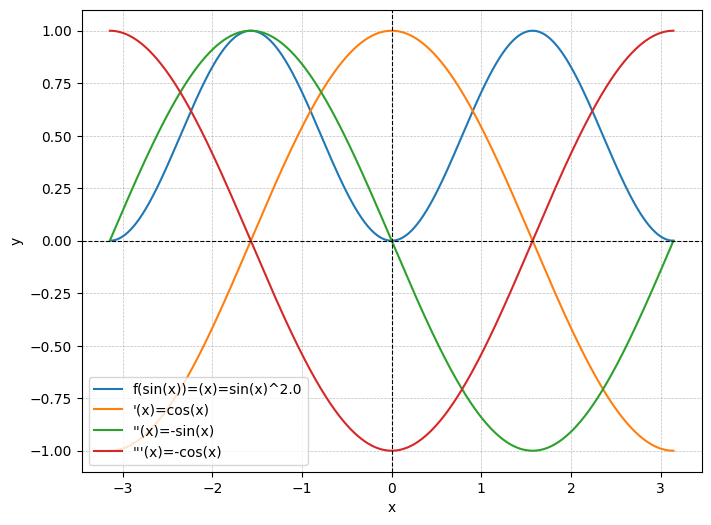

In [106]:
f = NestedFunc("f", PowerFunc("", 1.0, 2.0), SinFunc())
Plottable.multi_plot([f, 
                      f.derive(), 
                      f.derive().derive(),
                      f.derive().derive().derive()],
                      -math.pi, math.pi, 1000)

<div class="aufgabe">
    <h3> Produkt-Vereinfachung (schwer!)</h3>
    <img src="images/bonusstar223679.png" width=80 align=right alt="https://openclipart.org/detail/223679/simple-3d-star" />
    Ergänzen Sie eine statische Methode <tt>ProdFunc.simplify(infunc: ProdFunc) -> MFunc</tt>, die eine übergebene Produktfunktion vereinfacht:<br>
    <ul>
        <li>Mehrere gleiche Multiplikanden werden zu Exponenten (z.B. <tt>cos(x)*cos(x)->cos(x)^2.0</tt>)</li>
        <li>Kompatible Potenzen werden zusammengefasst (z.B. <tt>x^2.0*x^3.0->x^5.0</tt>)</li>
        <li>Konstantenfunktionen werden in den Faktor gezogen (z.B. <tt>2.0sin(x)*2.0->4.0sin(x)</tt>)</li>
        <li>Faktoren werden zusammengefasst, Konstanten in Potenzen ausmultipliziert (z.B. <tt>2.0(2.0x)^2->4.0x^2</tt>) </li>
        <li>Verbleibt nur ein Multiplikant, wird dieser direkt zurückgegeben (keine Produktfunktion)</li>
        <li>Verbleibt kein Multiplikant, wird eine Konstantenfunktion zurückgegeben</li>
    </ul>
    Alle diese Vereinfachungen sollen auch über mehrere ineinander verschachtelte Produkte hinweg umgesetzt werden.<br>
    Verwenden Sie diese Methode überall dort, wo Sie eine Produktfunktion erstellen.<br>
    Stellen Sie sicher, dass die zugehörigen Tests in <tt>ProdFunc</tt> und <tt>NestedFunc</tt> durchlaufen.
</div>

<details class="hint">
<summary></summary>
Sie brauchen vermutlich Rekursion.
    <details class="nexthint">
    <summary></summary>
       Versuchen Sie zunächst, alle Multiplikanden der verschachtelten ProdFunc zu finden und geordnet wieder zusammenzusetzen. Verwenden Sie ein Dictionary.
        <details class="nexthint">
        <summary></summary>
           Implementieren Sie dann Schritt für Schritt die genannten Ersetzungen anhand der Tests.
        </details>
    </details>
</details>


# Footer

In [ ]:
#Ausführen, um den aktuellen Footer anzuzeigen
from IPython.display import HTML
HTML(filename='files/footer.html')